# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.


**[5 marks]**

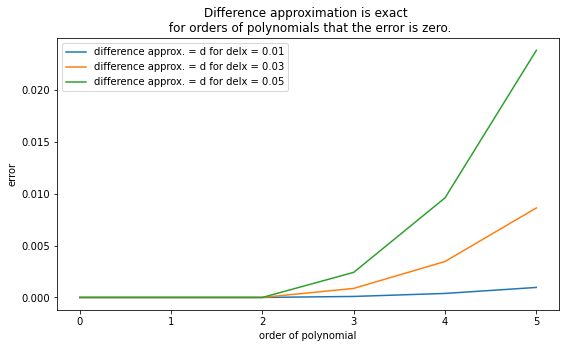

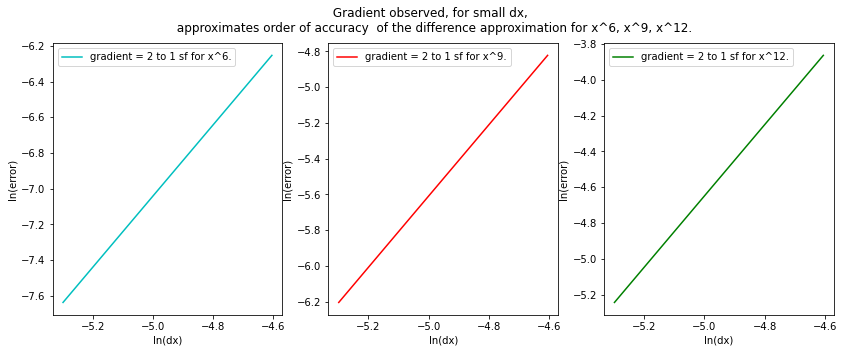

'\nFor small enough dx the only term that affects the plot is the lowest power \nas dx^n when n is larger becomes negligible.\nHowever, for dx too small error is introduced from storing the small value for calculations.\n\nThe gradient value for the given difference approximation is 2, this confirms the order of accuracy is 2.\n\nThe error increases with increasing delta x as expected.\n'

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def d(F, x, dx):
    '''
    Difference approximation using the function and alpha and beta values given above.
    '''
    y = (1/dx)*((-4/23)*F(x - (3/2)*dx) 
            + (-9/17)*F(x - (1/3)*dx) 
            + (275/391)*F(x + (4/5)*dx))
    return y
 
'''
Investigation 1:
Test the approximation for different order functions of form x^n, 
if the approximation is exact for x^k for k up to n then it is exact 
for any linear combination of them.
'''
def error_plot(func, N):
    
    assert callable(func), 'The 1st argument must be a function.'
    assert type(N) == int, 'The 2nd argument must be an integer corresponding to the highest order to be checked.'
    
    fig, ax = plt.subplots(figsize = (9, 5))
    order = np.zeros(N)
    
    ax.title.set_text('Difference approximation is exact \n for orders of polynomials that the error is zero.')
    
    # order values for each equation the error is found for to plot on the x-axis
    for i in range(N):
        order[i] = i
        
    for p in range(3): 
        err_vals = np.zeros(N)
        # Calculating absolute error of difference approximation for equations of every order up to N
        # for 3 different dt values.
        for n in range(N):
            x = 1
            delx = 0.01*(2*p+1)

            # Define a single variable function of order n to test and it's respective analytic derivative
           
            def F(x):
                return x**n
            def dF(x):
                return n*x**(n-1)

            error = abs(func(F, x, delx) - dF(x))

            err_vals[n] = error

        ax.plot(order, err_vals, label = f'difference approx. = {func.__name__} for delx = {delx:.2f}')

    ax.set_ylabel('error')
    ax.set_xlabel('order of polynomial')  
    ax.legend()
    

    '''
    Investigation 2:
    Investigate which power of dt the error is proportional to by plotting double log graph of error and dt.
    '''
    fig, ax = plt.subplots(1, 3, figsize = (14, 5))
   
    
    # To plot each test polynomial as a different colour.
    colour = ['c-', 'r-', 'g-']
    
    # dt values to take log of and plot.
    del_vals = np.linspace(0.005, 0.01, 30)
    
    error = np.zeros(30)
    
    for j in range(3):
        # To choose order n polynomial each iteration.
        n = 3*j + 6
        for i in range(len(del_vals)):

            err = abs(func(F, x, del_vals[i]) - dF(x))
            error[i] = err
        
        # calculating a gradient from two points on each graph.
        m = np.log(error[28]/error[3])/np.log(del_vals[28]/del_vals[3])

        ax[j].plot(np.log(del_vals), np.log(error), colour[j], label = f'gradient = {m:.0f} to 1 sf for x^{n}.')
        ax[j].set_ylabel('ln(error)')
        ax[j].set_xlabel('ln(dx)')
        ax[j].legend()
    fig.suptitle(f' Gradient observed, for small dx, \n  approximates order of accuracy  of the difference approximation for x^6, x^9, x^12.')
    
    plt.show()

# Use above function on our given difference approximation.
error_plot(d, 6)

'''
For small enough dx the only term that affects the plot is the lowest power 
as dx^n when n is larger becomes negligible.
However, for dx too small error is introduced from storing the small value for calculations.

The gradient value for the given difference approximation is 2, this confirms the order of accuracy is 2.

The error increases with increasing delta x as expected.
'''

**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

*📝$N_{p} = p + 1 $ as the coefficients of the first p + 1 terms of the taylor expansion of the difference approximation must be zero for pth order accuracy, (i.e. for the lowest power dt term to be p). Each coefficient is an expression of $\alpha_{i}$s and $\beta_{i}$s which when set equal to zero becomes an equation. You get an $\alpha_{i}$ for each of the N terms you sum in the difference approximation expression above and $\beta_{i}$s are known. In order to always be able to satisfy p + 1 equations you need at least p + 1 unknowns so N must be at least p + 1. Therefore $N_{p} = p + 1$ as it is the minimum N. *

**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

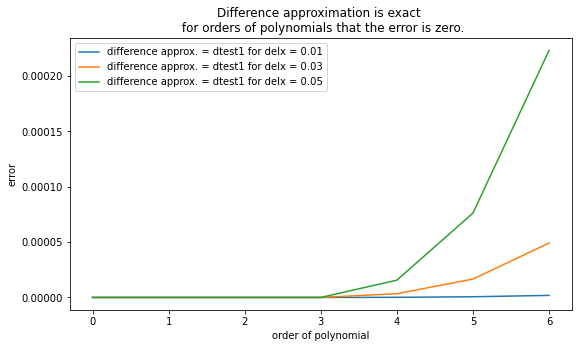

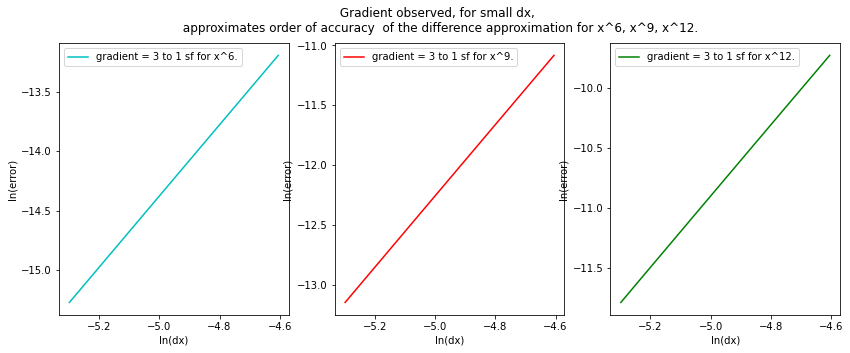

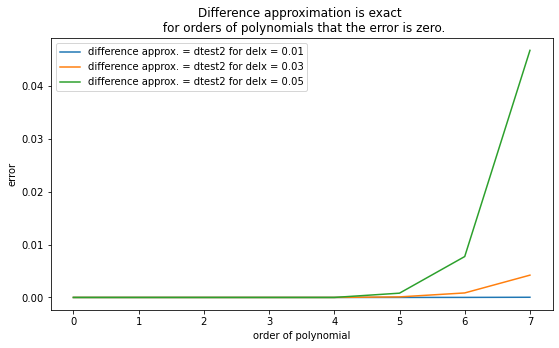

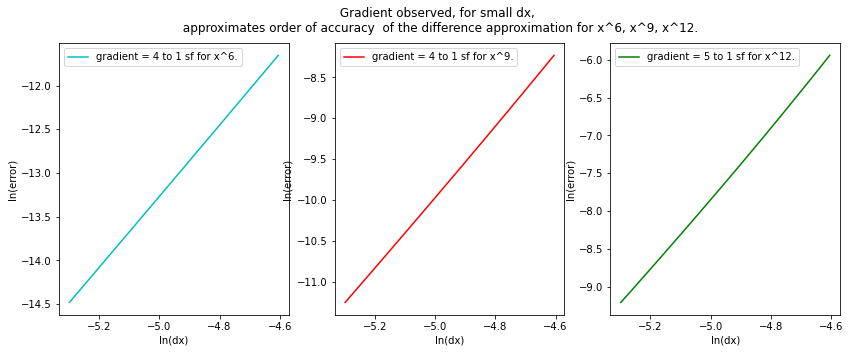

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def FD_coefficients(beta_vals):
    '''
    Finds N alpha coefficients from N given beta values.
    '''
    l = len(beta_vals)
    beta = np.zeros((l, l), dtype = float)
    # l here is p + 1
    for i in range(l):
        for j in range(l):
            # beta value coefficients of alphas increase in power for each term of the taylor expansion
            # divided by the factorial of that power, so make an array containing them. 
            beta[i, j] = (beta_vals[j]**i)/np.math.factorial(i)
    
    # p + 1 coefficients of the expansion terms must all be zero when you substract them from the first derivative
    # so the coefficient for the first derivative of the difference approximation 
    # (i.e. the second row of beta value matrix) must be 1, the rest 0.
    solns = np.zeros(l)
    solns[1] = 1
    
    alphas = np.linalg.solve(beta, solns)
    return alphas

def diff_approx(F, x, dx, a, b):
    '''
    Difference approximation by the above expression using beta values (b) and alpha values (a).
    '''
    y = 0
    for i in range(len(a)):
        y += (1/dx)*(a[i])*F(x + (b[i])*dx)
    return y

# Check 1, I want p = 3 so N_p = 4 (4 beta values needed) and the approximation should be 3rd order accurate.
# Random beta values chosen.
b1 = [-1/2, 1/2, 3/4, -5/4]
a1 = FD_coefficients(b1)

# Change number of arguments and coefficients of difference approximations for use in the error_plot function.
def dtest1(F, x, dx):
    return diff_approx(F, x, dx, a1, b1) 

error_plot(dtest1, 7)

# Check 2, p = 4 so N_p = 5 and the approximation should be 4th order accurate.
b2 = [-1/2, 5, 3/4, -1/10, 66]
a2 = FD_coefficients(b2)

# Again changing to a function of 3 arguments.
def dtest2(F, x, dx):
    return diff_approx(F, x, dx, a2, b2) 

error_plot(dtest2, 8)


---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [28]:
import numpy as np
import numpy.ma as ma

def p(z, c):
    '''
    computes p(z) = z^3 + (c-1)*z - c elementwise for array inputs z and scalar inputs c.
    '''
    return np.multiply(np.multiply(z, z), z) + (c - 1)*z - c*np.ones(z.shape)


def dp(z, c):
    '''
    computes derivative values of p(z) = z^3 + (c-1)*z - c, (dp(z) = 3*z^2 + (c - 1)) elementwise 
    for array inputs z and scalar inputs c.
    '''
    return 3*np.multiply(z, z) + (c - 1)*np.ones(z.shape)


def Newt_Raph(z, c, its, mask):
   
    next_z = np.zeros(z.shape, dtype = complex)
    inv_mask = mask != True
    '''
    Applies Newton's method on p(z) to entries of z for which the mask is false and 
    does nothing for the entries that are true.
    '''
    next_z[mask] = z[mask]
    next_z[inv_mask] = (z - np.divide(p(z, c), dp(z, c)))[inv_mask]
    '''
    Increases the iteration count by 1 of entries in 'its' where corresponding elements
    in the final argument, mask, are false and by 0 when true. 
    '''
    its_new = np.add(its, np.array(inv_mask, dtype = int))
    
    return z, next_z, its_new


def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots):
    '''
    Takes an array of complex root guesses for function p(x), 
    and returns a corresponding array of iteration count required 
    to achieve convergence up to 40, using the Newton-Raphson method of root finding. 
    '''
    assert isinstance(amin, (int, float)), '1st argument, amin, must be real number'
    assert isinstance(amax, (int, float)), '2nd argument, amax, must be real number'
    assert isinstance(bmin, (int, float)), '3rd argument, bmin, must be real number'
    assert isinstance(bmax, (int, float)), '4th argument, bmax, must be real number'
    assert isinstance(c, (int, float, complex)), '5th argument, c, must be number, real and complex'
    assert isinstance(N, int), '6th argument, N, must be an integer'
    assert N > 0, 'N must be a positive number'
    assert isinstance(eps, float), '7th argument, eps, must be a number'

    # Linearly spaced real and imaginary components between a and b, min and max arguments
    re_guess = np.linspace(amin, amax, N)
    im_guess = np.linspace(bmin, bmax, N)
    
    # An array (kmax) of all combinations of real and imaginary components as root guesses
    kmax = np.zeros((N,N), dtype = complex)
    
    root_guess = np.zeros((N,N), dtype = complex)
    iterations = np.zeros((N,N), dtype = int)
    
    # Initial mask condition to conduct at least one iteration in order to check convergence at the tolerance (eps).
    mask = np.zeros((N, N), dtype = bool)
    
    # Construct the array of inital guesses
    for i in range(N):
        root_guess[i, :] += re_guess
        root_guess[:, i] += (im_guess)*1j
        
        kmax = root_guess
    
    if target_roots == None:
        # Sum(mask) will be N^2 when conditions are satisfied for all entries
        while sum(sum(mask)) < N**2:
            # calculate the next iteration.
            kmax, next_kmax, iterations = Newt_Raph(kmax, c, iterations, mask)
            
            # Check if absolute difference between consecutive iterations of Newton's method 
            # is less than the tolerance
            k_diff = np.absolute(np.add(kmax, -1*next_kmax))
            tr_f2 = np.array([(y <= eps) for y in k_diff], dtype = bool)
            
            # Check if iteration count has reached the maximum
            tr_f1 = np.array([(x >= 40) for x in iterations], dtype = bool)
            
            # Make a mask that is true when either of tr_f1 or tr_f2 conditions are satisfied
            mask = np.add(tr_f1, tr_f2, dtype = bool)
            
            kmax = next_kmax
        
        # Mask values for entries that don't converge
        tr_f1 = np.array([(x >= 40) for x in iterations], dtype = bool)
        iterations = ma.masked_array(iterations, tr_f1)
        
        return iterations
    
    elif type(target_roots) == complex:
        while sum(sum(mask)) < N**2:
            # Calculate the next iteration.
            kmax, next_kmax, iterations = Newt_Raph(kmax, c, iterations, mask)
            
            target = target_roots*np.ones((N,N))
            
            # Check absolute difference between target value and Newton iterated root values 
            # instead of consecutive values
            k_diff = np.absolute(np.add(target, -1*next_kmax))
            
            # Mask that is true for either of the following conditions
            tr_f1 = np.array([(x >= 40) for x in iterations], dtype = bool)
            tr_f2 = np.array([(y <= eps) for y in k_diff], dtype = bool)
            
            mask = np.add(tr_f1, tr_f2, dtype = bool)
            
            # Redefine argument value in preparation for next iteration.
            kmax = next_kmax
        
        tr_f1 = np.array([(x >= 40) for x in iterations], dtype = bool)
        iterations = ma.masked_array(iterations, tr_f1)
        
        return iterations
          

**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

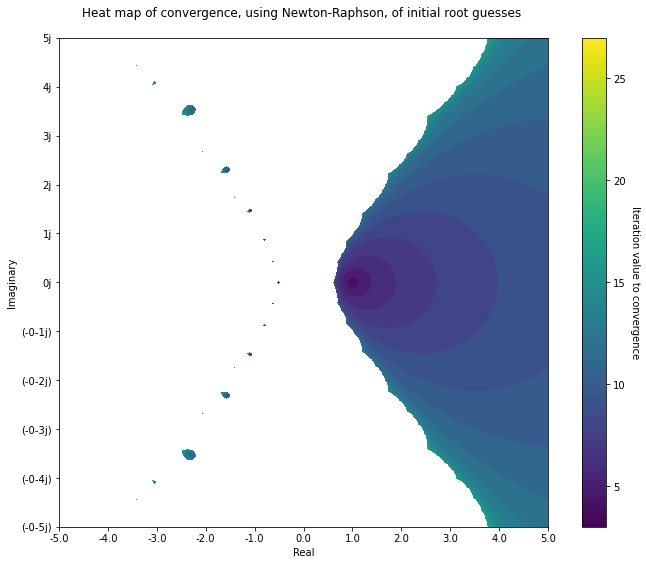

In [29]:
import matplotlib.pyplot as plt

def plot_heatmap(iterations):
    
    '''
    After using newtons method to find the array of iteration values (iterations) 
    we then plot them as a heatmap.
    '''
    assert len(iterations.shape) == 2, 'Argument needs to be a two dimensional array'
   
    fig, ax = plt.subplots(figsize = (12, 9))
    # plot values and flip in the x axis to have imaginary axis from -5 to 5 rather than 5 to -5.
    im = ax.imshow(np.flip(iterations, axis = 0))
    # Add colourbar to give iteration values to each colour and label.
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Iteration value to convergence', rotation=-90, va="bottom")

    # Title and axis labels
    ax.set_title('Heat map of convergence, using Newton-Raphson, of initial root guesses \n')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')

    # Make sure x and y axis show the initial root values that the iteration values correspond to.
    ax.set_xticks(np.linspace(0, 1000, 11))
    ax.set_yticks(np.linspace(0, 1000, 11))
    ax.set_xticklabels(np.linspace(-5, 5, 11))
    ax.set_yticklabels(np.linspace(5, -5, 11)*1j)

    plt.show()

# define argument array and implement function defined above
iterations = complex_newton(-5, 5, -5, 5, 0, 1000, 1e-13, (1 + 0*1j))
plot_heatmap(iterations)

**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

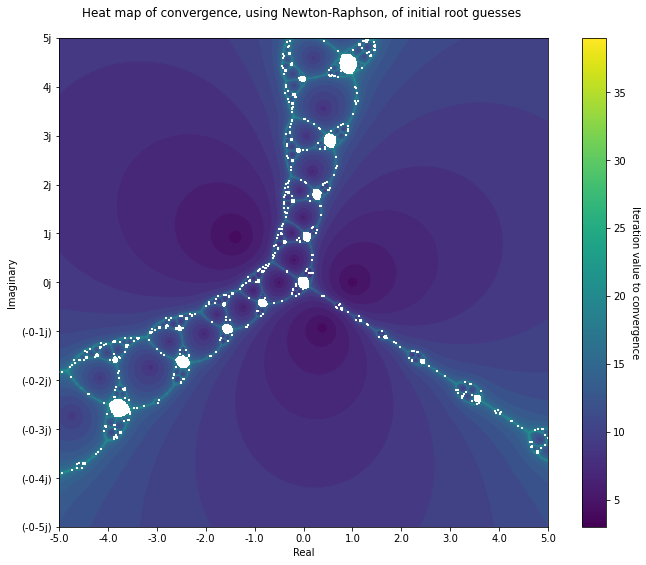

In [30]:
import matplotlib.pyplot as plt
# Use function above for a different array of iteration values with given c value.
c = (0.32 + 1.64j)
iterations = complex_newton(-5, 5, -5, 5, c, 1000, 1e-8, None)
plot_heatmap(iterations)

In [31]:
import numpy as np

# After checking 50, printing out 20 successive iterations of Newton-Raphson for p(z) 
# with diverging initial root guesses as below in 'initial'.
initial = np.array([0 + 0*1j, 
                    0.9 + 4.6j, 
                    -3.8 - 2.6j])

z = Newt_Raph(initial, (0.32 + 1.64j), [0], [0])[1]
print(f'root {initial[0]} diverging, root {initial[1]} diverging, root {initial[2]} diverging \n')

for i in range(20):
    print(z)
    z = Newt_Raph(z, (0.32 + 1.64j), [0], [0])[1]

root 0j diverging, root (0.9+4.6j) diverging, root (-3.8-2.6j) diverging 

[ 0.78426396-0.52030457j  0.53731754+2.99536965j -2.48909883-1.64741053j]
[ 0.00330492+0.01200834j  0.26870684+1.86891176j -1.57091628-0.96591312j]
[ 0.78401689-0.52031602j  0.05899159+0.99438384j -0.85095909-0.4374458j ]
[ 0.00180715+0.01197532j -0.02917538+0.06810116j -0.01903387-0.02119484j]
[0.78403929-0.52037027j 0.782398  -0.52926225j 0.78341181-0.5193322j ]
[ 0.00193523+0.0116434j  -0.00673087-0.04140958j -0.00172386+0.01806891j]
[0.78404885-0.52036059j 0.78162262-0.52110683j 0.78388544-0.5206729j ]
[ 0.00199451+0.01170066j -0.01289567+0.00732909j  0.00096403+0.00982991j]
[0.78404596-0.52035941j 0.78458384-0.5204555j  0.78412001-0.52036377j]
[0.0019772 +0.01170823j 0.00521308+0.01104827j 0.00242506+0.01167131j]
[0.78404596-0.52036013j 0.78403687-0.52023472j 0.78404073-0.52034387j]
[0.0019771 +0.01170389j 0.00194006+0.01246533j 0.00194766+0.01180314j]
[0.78404612-0.52036007j 0.78401949-0.52037352j 0.784043

**Each of the initial root values which does not converge eventually alternates between two iterating root values, 0.00197786+0.01170437j and 0.78404609-0.52036005j. **

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [32]:
import numpy as np

# Setting up the initial conditions, epsilon, lambda and beta
ep, la, beta = 0.2, 0.8, 0.7

# Combining the initial equations into a vectorized function, f = u_dot and g = v_dot
def H(x, I, la):
    f = (1/ep)*(x[0] - ((x[0]**3)/3) - x[1] + I)
    g = ep*(x[0] - la*x[1] + beta)
    fx = np.array([f, g])
    return fx

# Defining the partials of f and the jacobian of f and g
def df_du(x):
    return (1/ep)*(1 - (x[0]**2))
def df_dv(x):
    return -(1/ep)

def jacobian_k(x_k):
    jk = np.array([[df_du(x_k), df_dv(x_k)],
                  [ep,         -ep*la]])
    return jk

# Using Gaussian elimination to find J_k(inverse)*x_k to use in Newton's vectorized root finding method.
def jk_invx_k(x_k, I, la):
    y = np.linalg.solve(jacobian_k(x_k), H(x_k, I, la))
    return y

def resting_state(x_0, I, N, la):
    '''
    Determines the resting state of the system of differential equations,
    based on the initial guess x_0 = [u1_0, v1_0], using Newton's method of root finding.
    '''
    # set initial conditions to check convergence to tolerance 1e-10
    x_k = x_0
    x_kplus1 = np.add(x_k, -1*jk_invx_k(x_k, I, la))
    
    count = 0
    while np.linalg.norm(np.add(x_kplus1, -1*x_k)) >= 1e-10:
        if count <= N:
            count += 1
            # set up new values for next iteration
            x_k = x_kplus1
            x_kplus1 = np.add(x_k, -1*jk_invx_k(x_k, I, la))
        
        else:
            print(f'The iteration count of {N} was exceeded and x_k = {x_kplus1}')
            break
            
    print(f'The resting state of f and g with inital input {x_0}\n and I = {I} is {x_k}')
    return x_kplus1

I1, I2 = 0, 0.5
x_0 = np.array([0.2, 0.2])

# output values asked for in question
# I = 0.0
rest_00 = resting_state(x_0, I1, 20, la)
# I = 0.5
rest_05 = resting_state(x_0, I2, 20, la)


The resting state of f and g with inital input [0.2 0.2]
 and I = 0 is [-1.19940804 -0.62426004]
The resting state of f and g with inital input [0.2 0.2]
 and I = 0.5 is [-0.80484775 -0.13105968]


**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

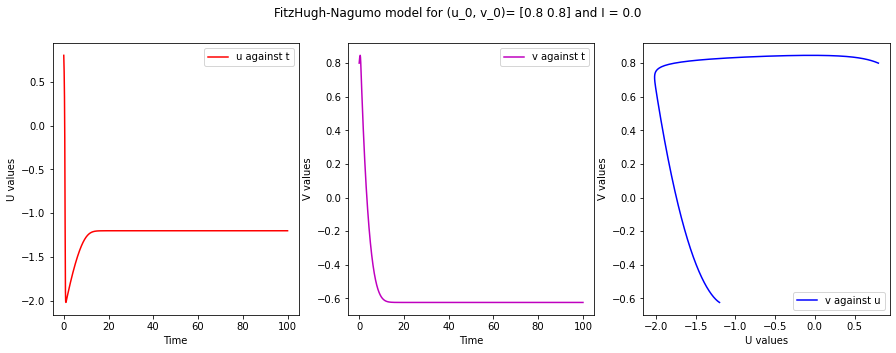

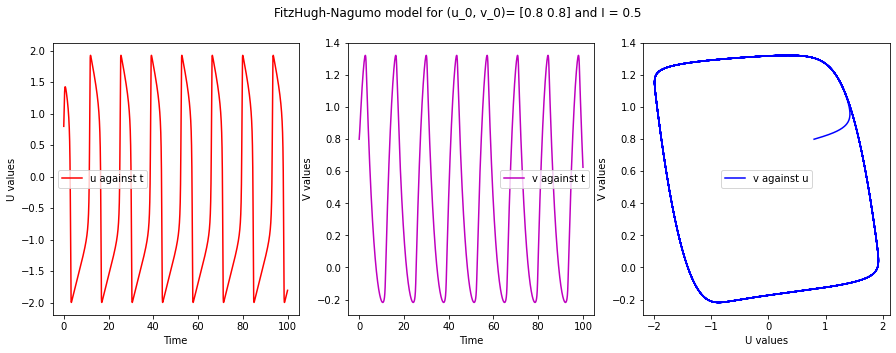

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Initial conditions
ep, la, beta = 0.2, 0.8, 0.7

def i(y_0, dt, t_max, I, la):
    '''
    Using the forward Euler method to integrate over the two functions.
    '''
    
    N = int(t_max/dt)
    # Create an array for the plot points on the x-axis with corresponding time values t+n*dt for n = 0, 1, 2, ...
    t_vals = np.linspace(start = 0, stop = int(t_max), num = N)
    
    # Create an array that stores [u(t+n*dt), v(t+n*dt)] for all n in N
    y_vals = np.zeros((2, N))
    y_vals[:, 0] = y_0
    
    y = y_0 
    for i in range(N - 1):
        '''
        Construct the equation of the tangent line using H as a vector function of f and g
        and y = y(t) and y_next = y(t+dt).
        '''
        y_next = y + dt*H(y, I, la)
        
        y_vals[:, (i + 1)] = y_next
        y = y_next
        
    return t_vals, y_vals


def plot_vals(y_0, dt, t_max, I, b):
    '''
    For function f and g, u dot and v dot, this plots u and v values for each time-step, 
    dt apart, up to t_max.
    Producing 3 plots, u against t, v against t and v against u.
    '''
    assert isinstance(y_0, (int, float)), '1st argument, y_0, must be a number'
    assert isinstance(dt, (float)), '2nd argument, dt, must be a small number'
    assert isinstance(t_max, (int, float)), '3rd argument, t_max, must be a number'
    assert t_max > 0, '3rd argument, t_max, must be positive'
    assert isinstance(I, (int, float)), '4th argument must be a number'
    assert isinstance(b, (int, float)), 'final argument must be a number'
                      
    fig, ax1 = plt.subplots(1,3, figsize = (15, 5))

    delta = [0.0, 0.3, 0.6, 1]
    # Create an array of graph colours to index to distinguish each delta value plot on the same graph 
    col = ['r-', 'm-', 'b-', 'c-']
    
    if len(y_0.shape) > 1:
        # When more than one initial value (u0, v0) is given 
        fig.suptitle(f'FitzHugh-Nagumo model for (u_0 + del, v_0 + del) where (u_0, v_0)= {y_0[0]} and I = {I}')
        for n in range(y_0.shape[0]):
            # Index outputs of the forward Euler method function 
            # to find arrays of time values and u and v at those times
            t, u = i(y_0[n], dt, 100, I, b)[0], i(y_0[n], dt, 100, I, la)[1][0, :]
            v = i(y_0[n], dt, 100, I, la)[1][1, :]
            
            ax1[0].plot(t, u, col[n], label = f'del = {delta[n]}')
            ax1[1].plot(t, v , col[n], label = f'del = {delta[n]}')
            ax1[2].plot(u, v, col[n], label = f'del = {delta[n]}')
    
    elif len(y_0.shape) == 1:
        # When only one initial value (u0, v0) is given 
        fig.suptitle(f'FitzHugh-Nagumo model for (u_0, v_0)= {y_0} and I = {I}')
        
        t, u = i(y_0, dt, 100, I, b)[0], i(y_0, dt, 100, I, la)[1][0, :]
        v = i(y_0, dt, 100, I, la)[1][1, :]
        
        # the 3 plots
        ax1[0].plot(t, u, 'r-', label = 'u against t')
        ax1[1].plot(t, v, 'm-', label = 'v against t')
        ax1[2].plot(u, v, 'b-', label = 'v against u')

    for a in range(3):
        ax1[a].legend()

    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('U values')
    ax1[1].set_xlabel('Time')
    ax1[1].set_ylabel('V values')
    ax1[2].set_xlabel('U values')
    ax1[2].set_ylabel('V values')
    
    plt.show()
    
    
# Specified initial values    
y_0 = np.array([0.8, 0.8])

# using a small time-step
dt = 0.01
t_max = 100

# Plot 1
I1 = 0.0
plot_vals(y_0, dt, t_max, I1, la)

# Plot 2
I2 = 0.5
plot_vals(y_0, dt, t_max, I2, la)

**📝The initial stimulus of I = 0.5 compared with 0 is enough to change the behaviour of variables u and v over time from eventual becoming constant to following a regular oscillating pattern between positive and negative values.
As for the phase space trajectories u and v will continue taking the same cycle of values as the iterations retrace the same cyclic path of values implying that the pattern will continue indefinitely for increasing t.**

**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [35]:
import numpy as np
'''
Using the rest state values calculated in 3.1 for inital input [0.2 0.2]
and I = 0 and I = 0.5 we find the eigenvalues of the corresponding jacobians.
'''
eig_vals00 = np.linalg.eig(jacobian_k(rest_00))[0]
eig_vals05 = np.linalg.eig(jacobian_k(rest_05))[0]

print(f'The eigenvalues for the jacobian at {rest_00} are {eig_vals00}.')
print(f'The eigenvalues for the jacobian at {rest_05} are {eig_vals05}.')

The eigenvalues for the jacobian at [-1.19940804 -0.62426004] are [-1.59644909+0.80265091j -1.59644909-0.80265091j].
The eigenvalues for the jacobian at [-0.80484775 -0.13105968] are [ 1.33234804 -0.57124752].


***📝 The eigenvalues for the jacobian under rest initial condition at I = 0 are real and negative whereas for I = 0.5 they are a complex conjugate pair.**

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

The resting state of f and g with inital input [0.9 0.6]
 and I = 0 is [1.45290169 0.43058034]
The resting state of f and g with inital input [0.  0.4]
 and I = 0 is [0.17732319 0.17546464]
The resting state of f and g with inital input [-1.7 -0.3]
 and I = 0 is [-1.63022488 -0.18604498]


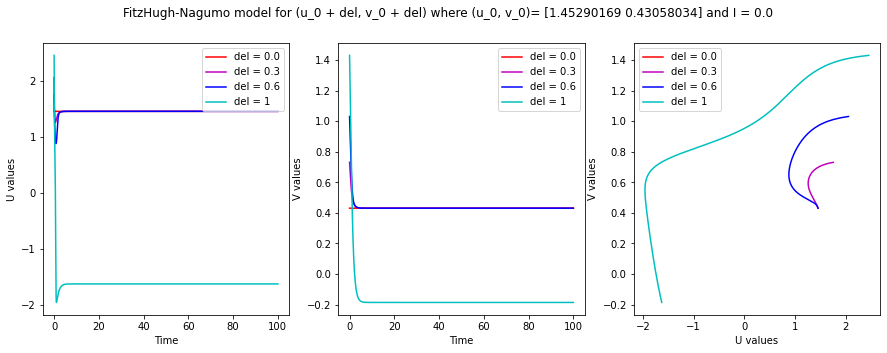

In [34]:
import numpy as np

# Initial conditions
uv0 = np.array([[0.9, 0.6],
                [0, 0.4],
                [-1.7, -0.3]])
# Changed lambda value
la = 5

# Finding the rest state values for each of the initial conditions given
u1, v1 = resting_state(uv0[0], 0, 20, la)
u2, v2 = resting_state(uv0[1], 0, 20, la)
u3, v3 = resting_state(uv0[2], 0, 20, la)

# Creating an array of values delta away from those rest state values
del_vals = np.array([[0, 0], 
                     [0.3, 0.3], 
                     [0.6, 0.6], 
                     [1, 1]])
rest_state1 = np.array([[u1, v1], 
                      [u1, v1], 
                      [u1, v1], 
                      [u1, v1]])

plot = np.add(rest_state1, del_vals)

# Only plotting for (𝑢∗_0,𝑣∗_0) initial value.
plot_vals(plot, dt, t_max, I1, la)


***📝 Different initial guesses lead to the different resting states just like newtons method in 1 dimension converges to different roots for different initial values. Values in a small range (i.e. d = 0, 0.3 and 0.6) around the resting value converge to that value but if you get too far away they converge to a different resting state instead (i.e. d = 1). The final plot shows the path from the inital condition to the rest state it converged to.**